In [1]:
import warnings
warnings.filterwarnings('ignore', lineno=872)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx

import seaborn as sns
sns.set(style='ticks', color_codes=True, font_scale=1.3)

#Question 1: NetworkX Basics

#1 (a)
Generate a random network, g1, of 100 nodes using the Erdős–Rényi model. The code is provided

In [2]:
import networkx as nx
g1 = nx.erdos_renyi_graph(100, 0.05)

#1 (b)
Visualize the network g1. The code is provided 

//anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


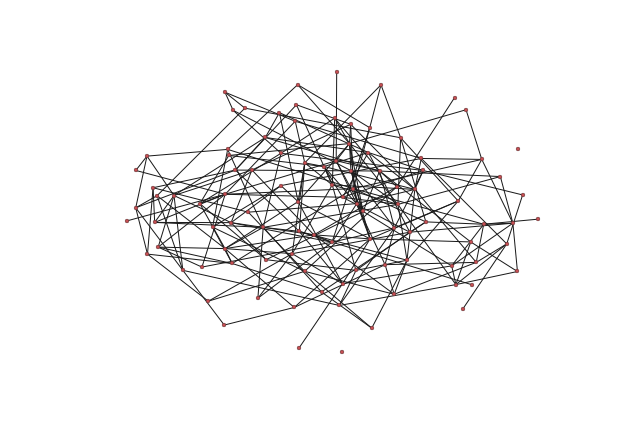

In [3]:
nx.draw(g1, node_size=15)

#1 (c)
Plot the degree distribution of g1 using the code below.

<Container object of 12 artists>

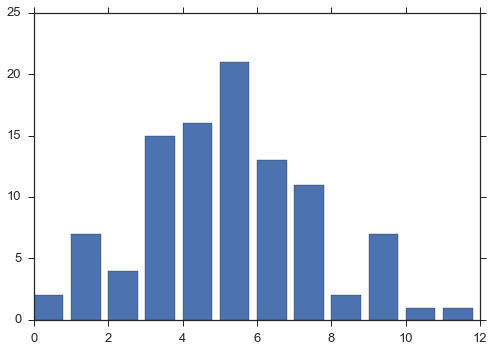

In [4]:
dh = nx.degree_histogram(g1)
plt.bar(range(len(dh)),dh)

#1 (d)
Generate a scale-free network, g2, of 100 nodes using the Barabási–Albert model.

In [5]:
g2 = nx.barabasi_albert_graph(100, 1)

#1 (e)
Visualize the network g2.

//anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


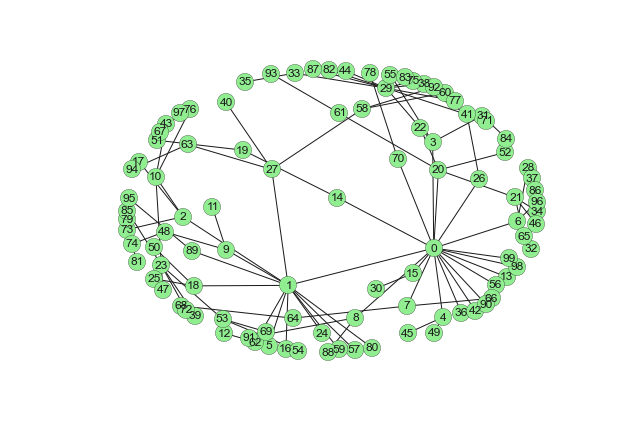

In [6]:
nx.draw(g2, node_color='lightgreen', with_labels=True)

#1 (f)
Plot the degree distribution of g2

<Container object of 19 artists>

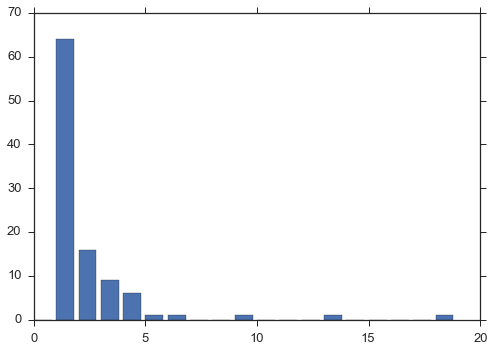

In [7]:
dh = nx.degree_histogram(g2)
plt.bar(range(len(dh)),dh)
#print ('Degree Distribution:', g2.degree())

#1 (g)
Compare the degree distributions of the two networks. What are the names of the two distributions (normal, binomial, exponential, power law, ...) respectively? You may want to look up the definition of the models (Erdős–Rényi model and Barabási–Albert model).

g1 follows a binomial distribution while g2 follows a power-law degree distribution.

#Question 2: Karate Network with NetworkX

In 1977, Wayne W. Zachary published a paper in the Journal of Anthropological Research titled "An Information Flow Model for Conflict and Fission in Small Groups." In this paper, he wrote about a social network of friendships between 34 members of a karate club at a US university. This paper depicted the information flow model for conflict and fission in small groups. (Quoted from Gephi Cookbook).
In this problem, we are going to dig into this case study and get a better understanding of this dataset. Please continue using NetworkX to finish the tasks below.

#2 (a)
Import the karate network using the code below (the package comes with the network built-in).

In [8]:
g = nx.karate_club_graph()

#2 (b)
How many nodes and how many edges are there in the network?

In [9]:
node = g.nodes() 
len(node) # number of nodes

34

In [10]:
edge = g.edges() 
len(edge) # number of edges

78

#2 (c)
Plot the degree distribution of this network. Compare it with the two distributions of the previous question: which one is the degree distribution of this network more similar to?

<Container object of 18 artists>

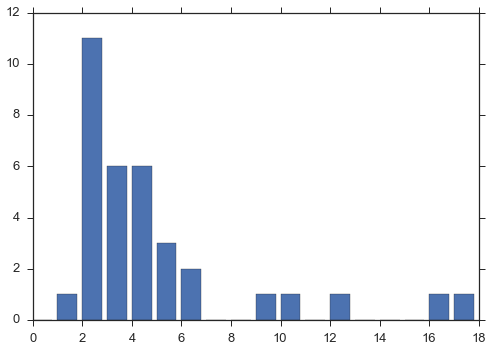

In [11]:
dh = nx.degree_histogram(g)
plt.bar(range(len(dh)),dh)

The degree distribution is more similar to that of g2.

#2 (d)
Calculate degree centrality, betweenness centrality, and closeness centrality of all nodes in the network. Save all results into a DataFrame. Then, answer the following questions.

In [12]:
d = nx.degree_centrality(g)

In [13]:
b = nx.betweenness_centrality(g, normalized=True)

In [14]:
c = nx.closeness_centrality(g)

In [15]:
df = pd.DataFrame()
df['Degree'] = d.values()
df['Betweenness'] = b.values()
df['Closeness'] = c.values()
df.head()

,Degree,Betweenness,Closeness
0,0.484848,0.437635,0.568966
1,0.272727,0.053937,0.485294
2,0.303030,0.143657,0.559322
3,0.181818,0.011909,0.464789
4,0.090909,0.000631,0.379310


#2 (d-1)
What are the two most important people in the network judging from degree centrality?

In [16]:
df.sort(['Degree'], ascending=False).head(2)

,Degree,Betweenness,Closeness
33,0.515152,0.304075,0.550000
0,0.484848,0.437635,0.568966


#2 (d-2) 
Between the above two people, does the person with a higher degree centrality also has a higher betweenness centrality? How would you explain this phenomenon intuitively?

No, the person with the highest degree centrality does not also have the higher betweenness centrality. This can be explained by understanding the relationship between degree centrality and betweenness. The higher the degree centrality, the lower the betweenness centrality because the less distance there will be from the center when the node has more ties. If a node has a high degree centrality it is less likely to be a bridge along the shortest path between two other nodes.

#2 (d-3) 
Between the same pair of people, who has a higher closeness centrality? How would you explain this?

Node 0, which has the lower degree centrality, has the higher closeness centrality meaning it has a shorter average path between the vertex and all vertices in the graph. The more central a node is, the lower it's total distance from all other nodes. Here node 0 is not as central so it's distance from other nodes is higher.

#2 (e)
Perform community detection using the community (python-louvain) package.

In [18]:
import community

#2 (e-1)
What is the number of communities (clusters)?

In [25]:
p = community.best_partition(g)

In [33]:
pd.Series(p).head()

0    0
1    0
2    0
3    0
4    1
dtype: int64

In [34]:
print ('Number of communites:', len(set(p.values())))

Number of communites: 4


#2 (e-2)
Visualize the result (draw the network using different colors for nodes of different clusters).

In [45]:
pos = nx.spring_layout(g)

//anaconda/lib/python3.4/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
//anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


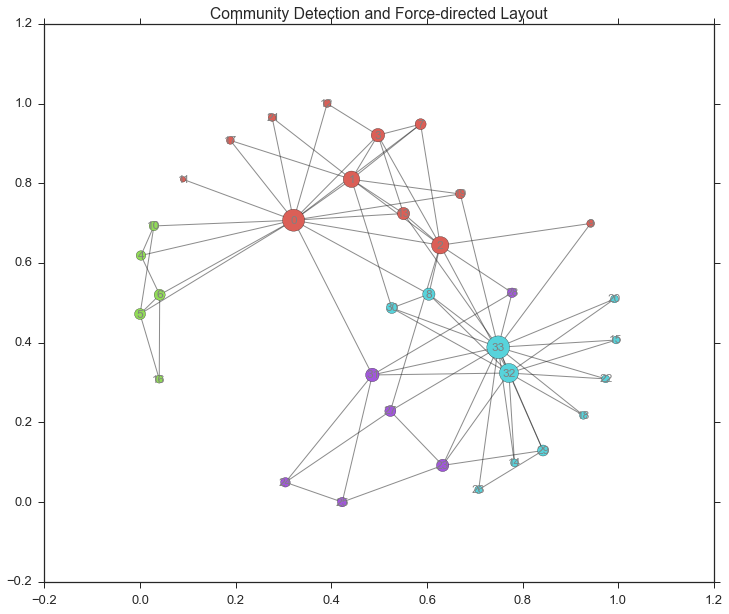

In [46]:
# Plot the nodes of each community using different colors.
n_communities = len(set(p.values()))
palette = sns.color_palette('hls', n_communities)
fig, ax = plt.subplots(figsize=(12,10))
for i, commuunity_id in enumerate(set(p.values())):
    nodes_in_community = [nodes for nodes in p.keys() 
                          if p[nodes] == commuunity_id]
    node_sizes = df.ix[nodes_in_community, 'Degree'] * 1000
    nx.draw_networkx_nodes(g, pos, nodes_in_community, 
                           node_size = node_sizes,
                           node_color = palette[i], 
                           ax=ax)

# TODO: draw network edges and labels
nx.draw_networkx_edges(g, pos, alpha=0.5, ax=ax)
nx.draw_networkx_labels(g, pos, font_size=12, font_color='grey', ax=ax);

# TODO: add a title "Community Detection and Force-directed Layout" using ax.set_title()
ax.set_title('Community Detection and Force-directed Layout');

#2 (f)
Run k-means clustering of the nodes by following the steps below 

#2 (f-1)
Extract features for each node. Use the identities of neighbors of as the features for each node. That means, you should generate a N-by-N matrix where N is the number of nodes; each row in the matrix represents a node, and each column is a feature, which is also a node. The code to generate the matrix is provided below.

In [47]:
X = nx.adjacency_matrix(g).todense()

#2 (f-2)
Run k-means with k=2 to cluster the nodes. The code is provided below.

In [49]:
import sklearn.cluster as skc
kmeans_model = skc.KMeans(n_clusters=2).fit(X)

#2 (f-3) 
Visualize the clustering result (draw the network using different colors for nodes of different clusters). Hint: you will need to fetch the cluster labels from the kmeans_model object, after which you may reuse the visualization code of the previous subproblem.

//anaconda/lib/python3.4/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
//anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


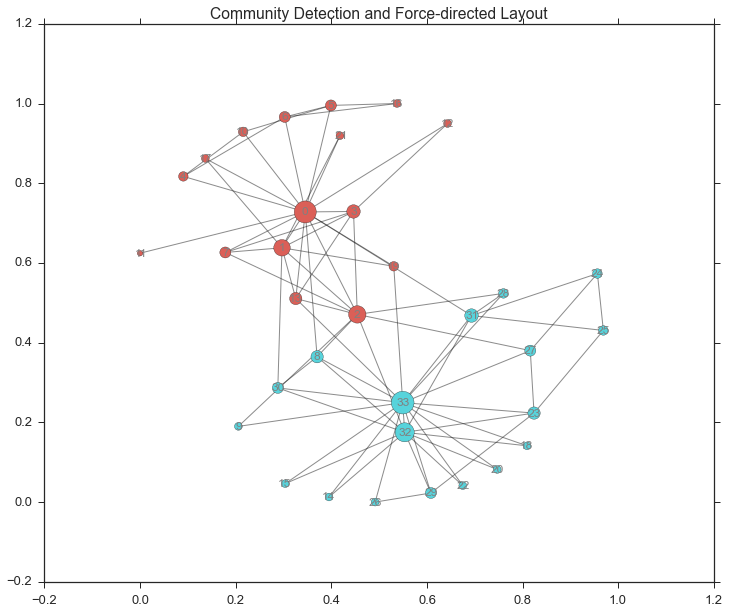

In [54]:
dic = pd.Series(kmeans_model.labels_)
dict_k = dic.to_dict()

pos = nx.spring_layout(g)


# Plot the nodes of each community using different colors.
n_communities = len(set(dict_k.values()))
palette = sns.color_palette('hls', n_communities)
fig, ax = plt.subplots(figsize=(12,10))
for i, commuunity_id in enumerate(set(dict_k.values())):
    nodes_in_community = [nodes for nodes in dict_k.keys() 
                          if dict_k[nodes] == commuunity_id]
    node_sizes = df.ix[nodes_in_community, 'Degree'] * 1000
    nx.draw_networkx_nodes(g, pos, nodes_in_community, 
                           node_size = node_sizes,
                           node_color = palette[i], 
                           ax=ax)

# TODO: draw network edges and labels
nx.draw_networkx_edges(g, pos, alpha=0.5, ax=ax)
nx.draw_networkx_labels(g, pos, font_size=12, font_color='grey', ax=ax);

# TODO: add a title "Community Detection and Force-directed Layout" using ax.set_title()
ax.set_title('Community Detection and Force-directed Layout');